In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
pd.set_option("display.precision", 4)

plt.style.use('dark_background')

# Create data

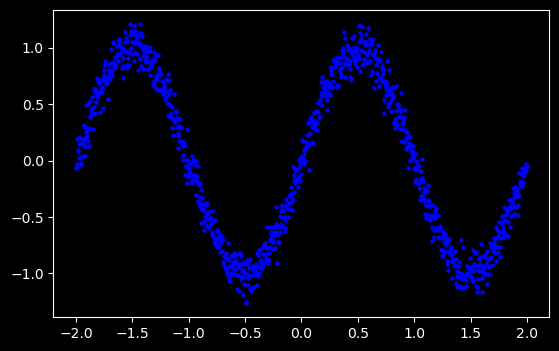

In [121]:
nPts = 1000

x = np.linspace(-2, 2, nPts)
X = x[:, np.newaxis]

# linear data
#m = 1
#b = 0
#y = m*x + b + np.random.normal(0, 0.1, nPts)

# sin data
y = np.sin(2*np.pi*x/2) + np.random.normal(0, 0.1, nPts)

# smoothe random data
#window = 30
#y = pd.Series(np.random.randn(nPts+window-1)).cumsum().rolling(window=window).mean().dropna()
#y = y / y.abs().max() * 2
#y = y.values

plt.scatter(x, y, c='b', s=5)
plt.gca().set_aspect('equal')
plt.show()

# Modeling

## Preprocessing

In [122]:
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(y[:, np.newaxis])[:,0]
""";

In [123]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2)

## Create models

model1 has a single layer. model2 has several layers.

In [57]:
X.shape

(1000, 1)

In [58]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [67]:
# Model 1
model = Sequential([
    Dense(1, activation='relu', input_dim=X.shape[1]),
])

model.compile(
    optimizer='adam',
    loss='mse'
)

model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_17 (Dense)                     │ (None, 5)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16 (64.00 B)

 Trainable params: 16 (64.00 B)

 Non-trainable params: 0 (0.00 B)

In [141]:
from tensorflow.keras.optimizers import Adam

# Model 2
model = Sequential([
    Dense(30, activation='relu', input_dim=X.shape[1]),
    Dense(20, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer=Adam(learning_rate=0.01),
              loss='mean_squared_error')

model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_59 (Dense)                     │ (None, 30)                  │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_60 (Dense)                     │ (None, 20)                  │             620 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_61 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 901 (3.52 KB)

 Trainable params: 901 (3.52 KB)

 Non-trainable params: 0 (0.00 B)

## Train model

In [142]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    #steps_per_epoch=10,
    validation_data=(X_test, y_test),
    verbose=1,
)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.4611 - val_loss: 0.4025
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4153 - val_loss: 0.3684
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3848 - val_loss: 0.3472
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.3626 - val_loss: 0.3219
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.3386 - val_loss: 0.3059
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.3213 - val_loss: 0.2889
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2980 - val_loss: 0.2731
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.2800 - val_loss: 0.2477
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2507 - val_loss: 0.2322
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.2369 - val_loss: 0.2076
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.2079 - val_loss: 0.1869
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.1813 - val_l

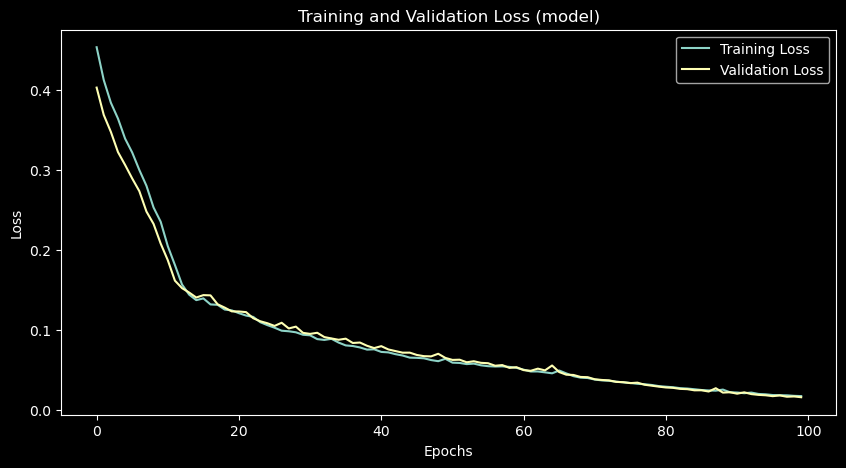

In [143]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
#plt.ylim(0,max(max(history.history['loss']),max(history.history['val_loss'])))
plt.legend()

## Check model performance

In [144]:
y_pred = model.predict(X)[:,0]
y_pred[:5]

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0.47356874, 0.47728187, 0.48099536, 0.48470813, 0.48842102],
      dtype=float32)

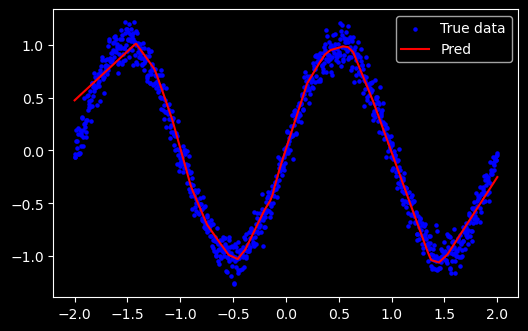

In [145]:
plt.figure(figsize=(6,6))
plt.scatter(x, y, c='b', s=5, label="True data")
plt.plot( x, y_pred, 'r', label="Pred" )
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

## Extrapolate model beyond training limits

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


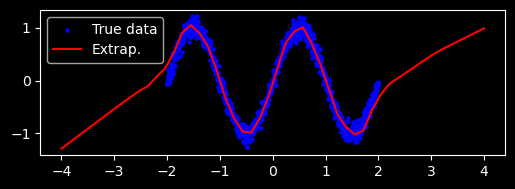

In [129]:
x_ext = np.linspace(-4,4,50)
X_ext = x_ext[:,np.newaxis]
#X_ext = X_ext % 2

y_ext = model.predict(X_ext)

plt.figure(figsize=(6,6))
plt.scatter(x, y, c='b', s=5, label="True data")
plt.plot( x_ext, y_ext, 'r', label="Extrap." )
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

## Examine model weights

In [130]:
for i, layer in enumerate(model.layers):
    print(f"Weights of layer {i}:")
    print(f'\tWeights: {layer.get_weights()[0]}')
    print(f'\tBiasess: {layer.get_weights()[1]}')
    print()
# end

Weights of layer 0:
	Weights: [[ 0.43949127 -0.5002143  -0.04990239  0.32240963 -0.35200453 -0.34075522
   0.02311293 -0.41170794  0.20603825 -0.13226874  0.36772665 -0.42118317
  -0.21868803 -0.5525578   0.12788072 -0.11888787  0.5750755   0.2726258
  -0.46291557 -0.34973046  0.21585216 -0.23889011 -0.29498366  0.44713128
  -0.36036107 -0.07865456  0.00917773  0.2928531  -0.4449727   0.028616  ]]
	Biasess: [ 0.13936858 -0.8279822  -0.1069588  -0.20649545 -0.17886358 -0.30810994
  0.0032464  -0.25837177  0.08147662 -0.04681833 -0.25904766  0.5222016
  0.10169715 -0.34965613  0.04419722  0.01338442 -0.77620566 -0.4497995
 -0.40899274 -0.40772602 -0.3506298   0.26892895 -0.4142152   0.06629919
 -0.16923612 -0.21230231 -0.0265549  -0.4884126  -0.20974737 -0.08164562]

Weights of layer 1:
	Weights: [[ 1.31024122e-02 -2.08721444e-01 -1.80066321e-02  7.29106665e-02
  -2.61122864e-02  1.54294372e-01 -8.83335710e-01 -2.50727117e-01
   1.50077149e-01 -8.56574625e-02  4.38895494e-01 -1.85752183e